In [19]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Dataset reading

In [20]:
# Upload the dataset
dataset = 'keypoint.csv'
NUM_CLASSES = 4

In [21]:
# Creating the dataset
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [22]:
# Creating the labels
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [23]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.25, random_state=RANDOM_SEED)

In [24]:
# Checking the shape of the dataset
print(X_train.shape)
print(y_train.shape)

(150, 42)
(150,)


# Model building

In [25]:
# Building the modle
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               5504      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 14020 (54.77 KB)
Trainable params: 14020 (54.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Model training

In [35]:
# Training the model
model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 0s 18ms/step - loss: 0.8749 - accuracy: 0.6000 - val_loss: 0.5700 - val_accuracy: 0.8000
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8712 - accuracy: 0.6133 - val_loss: 0.5394 - val_accuracy: 0.8000
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8459 - accuracy: 0.6333 - val_loss: 0.5139 - val_accuracy: 0.8200
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8671 - accuracy: 0.6400 - val_loss: 0.5965 - val_accuracy: 0.8600
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7721 - accuracy: 0.6600 - val_loss: 0.6485 - val_accuracy: 0.7800
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8355 - accuracy: 0.6600 - val_loss: 0.6264 - val_accuracy: 0.7600
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8277 - accuracy: 0.6600 - val_loss: 0.5818 - val_accuracy: 0.8000
Epoch 8/100
5/5 [=========

In [36]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
print(f'Test Accuracy: {val_acc * 100:.2f}%')

1/1 [==============================] - 0s 20ms/step - loss: 0.2256 - accuracy: 1.0000
Test Accuracy: 100.00%


# Confusion matrix

2/2 [==============================] - 0s 2ms/step


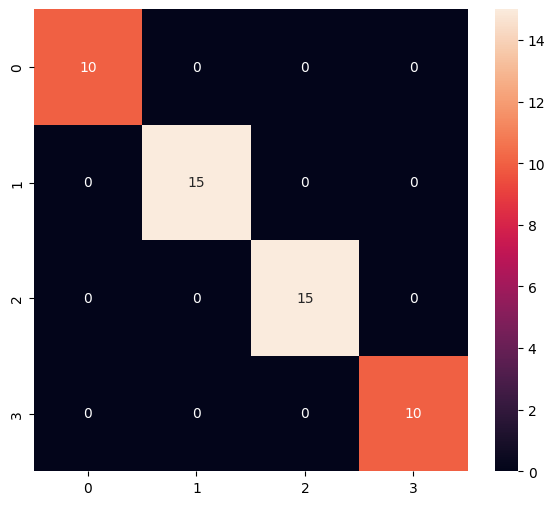

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Mediapipe Gesture

In [31]:
import cv2
import mediapipe as mp

In [32]:
# initialize mediapipe
# Import the MediaPipe Hands module
mpHands = mp.solutions.hands
# Create a Hands object
# - max_num_hands: Specifies the maximum number of hands to detect (in this case, set to 1)
# - min_detection_confidence: Specifies the minimum confidence value required for a hand to be detected
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)

# Import the MediaPipe Drawing Utilities module
mpDraw = mp.solutions.drawing_utils

- Palm (0)
- Fist (1)
- OK Sign (2)
- Peace Sign (3)

In [33]:
classNames = ['Palm','Fist','OK Sign','Peace Sign']

In [41]:
# Initialize the webcam
cap = cv2.VideoCapture(0)

# Initialize vertical position for hand information
y_position = 50

# Initialize mode
mode = 0

while True:
    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1) # to mirrior the image
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert the BGR image to RGB before processing For mediapipe

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Post process the result
    # Check if there are multiple hand landmarks detected in the frame
    if result.multi_hand_landmarks:
        # Iterate over each detected hand and its handedness information
        for handslms, handedness in zip(result.multi_hand_landmarks, result.multi_handedness):
            # Initialize an empty list to store hand landmarks
            landmarks = []

            # Iterate over each landmark in the hand
            for lm in handslms.landmark:
                # Convert normalized coordinates to pixel coordinates based on the frame size
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                # Append the pixel coordinates of the landmark to the list
                landmarks.append([lmx, lmy])

            # Determine hand color and name based on handedness.  handedness -> determine left or right hand
            if handedness.classification[0].label == 'Left':
                hand_color = (0, 255, 0)
                hand_name = 'Left Hand'
            else:
                hand_color = (255, 0, 0)
                hand_name = 'Right Hand'
            
            # Draw landmarks on the frame
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS,
                                  landmark_drawing_spec=mpDraw.DrawingSpec(color=hand_color))

            # Flatten the landmarks before predicting
            flat_landmarks = [item for sublist in landmarks for item in sublist]
            flat_landmarks = np.array(flat_landmarks).reshape(1, -1)

            # Predict gesture
            prediction = model.predict(flat_landmarks)
            # prediction = model.predict(landmarks)
            classID = np.argmax(prediction) # get the index of the max value (probability)
            className = classNames[classID]

            # Show hand information on separate lines
            cv2.putText(frame, f"{hand_name}: {className}", (10, y_position),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, hand_color, 2, cv2.LINE_AA)

            # Check for keypress 'k' to enter mode 1
            key = cv2.waitKey(1)
            if key == ord('k'):
                print("Press a number (0-9) to save hand landmarks for the corresponding class.")
                mode = 1

            # If in mode 1 and a number key (0-9) is pressed, save landmarks to CSV
            if mode == 1 and ord('0') <= key <= ord('9'):
                number = int(chr(key))
                csv_path = 'keypoint.csv'
                with open(csv_path, 'a', newline="") as f:
                    writer = csv.writer(f)
                    flat_landmarks = [item for sublist in landmarks for item in sublist]
                    writer.writerow([number] + flat_landmarks)
                print(f"Hand landmarks saved for class {number}")
                # Reset mode after saving
                mode = 0

            # Show mode-related text on the frame
            if mode == 1:
                cv2.putText(frame, "Enter class (0-9):", (10, y_position + 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)


    # Reset vertical position for the next frame
    y_position = 50

    # Show the final output
    cv2.imshow("Output", frame)

    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
Press a number (0-9) to save hand landmarks for the corresponding class.
1/1 [==============================] - 0s 16ms/step
Hand landmarks saved for class 0
1/1 [==============================] - 0s 16ms/step
